In [76]:
import io
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [13, 13]
sys.path.append("..")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read cities from CSV

In [11]:
# get data from CSV
cities_path = "../datasets/cities-data.csv"
names = ["id", "x", "y"]
data = pd.read_csv(cities_path, names=names, sep=',', header=None, skiprows=1)

print("Cities shape:", data.shape)
data.head()

Cities shape: (500, 3)


,id,x,y
0,0,962.0,482.0
1,1,236.0,623.0
2,2,447.0,511.0
3,3,754.0,54.0
4,4,397.0,210.0


In [43]:
import src.utils as utils

# get list of cities
x = data.iloc[:, 1]
y = data.iloc[:, 2]
cities = utils.get_cities_from_lists(x, y)
order = list(range(0, len(cities)))

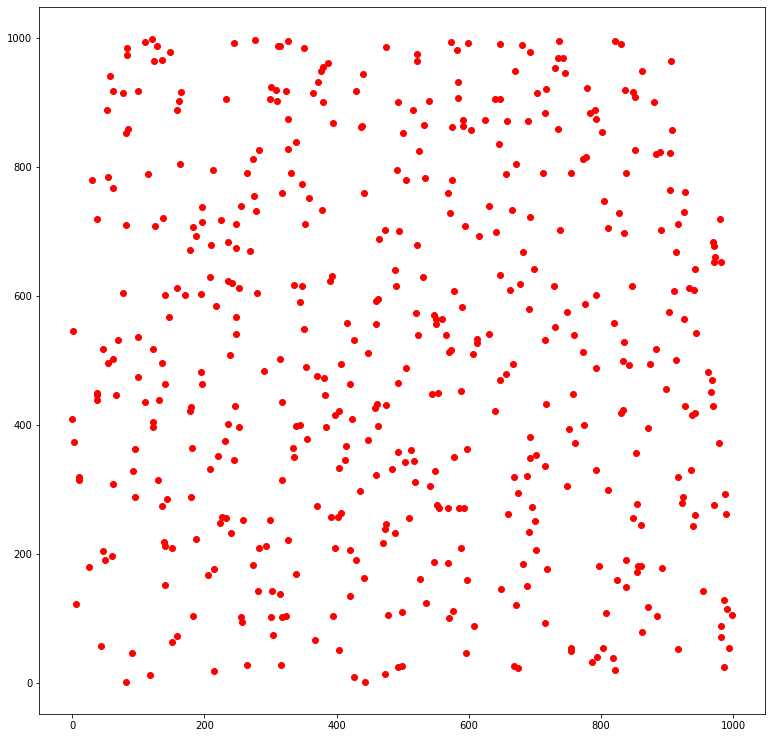

In [44]:
# plot cities
x = utils.get_x_list(cities, order)
y = utils.get_y_list(cities, order)
plt.plot(x, y, 'ro')
plt.show()

# Genrate random cities on a circle for tests

In [14]:
from src.city import City
from src.generate_data import generate_data

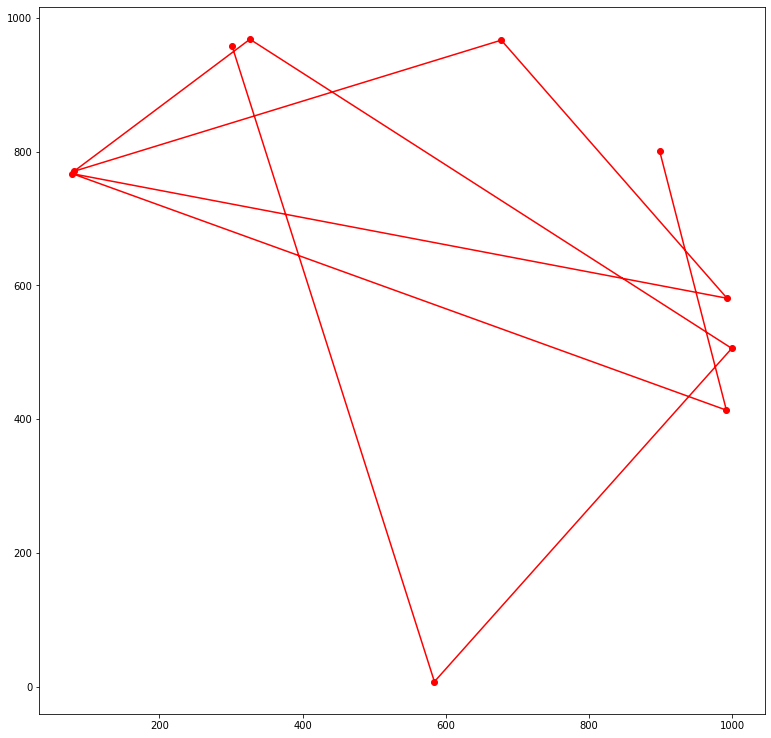

In [141]:
# generate test dataset
circle_cities = generate_data(10, 1000)
circle_order = list(range(0, len(circle_cities)))

# plot circle cities in initial order
x = utils.get_x_list(circle_cities, circle_order)
y = utils.get_y_list(circle_cities, circle_order)
plt.plot(x, y, linestyle='-', marker='o', color='r')
plt.show()

In [142]:
import src.genetic_algorithm as ga

In [143]:
# get initial population & calculate fitness
population = ga.get_initial_population(circle_cities, 50, circle_order)
fitness_list = []
for i in range(len(population)):
    fitness = ga.calculate_fitness(circle_cities, population[i])
    fitness_list.append(fitness)
    #print(population[i], " f:", fitness)

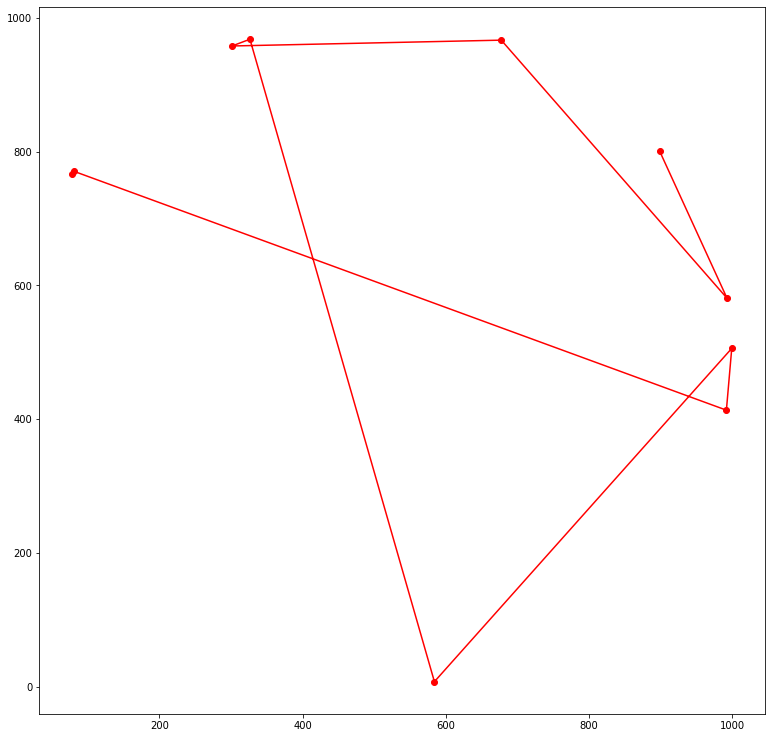

In [144]:
best_population_index = np.argmax(fitness_list)

x = utils.get_x_list(circle_cities, population[best_population_index])
y = utils.get_y_list(circle_cities, population[best_population_index])
plt.plot(x, y, linestyle='-', marker='o', color='r')
plt.show()

In [145]:
for i in range(5000):
    population = ga.next_generation(circle_cities, population)

fitness_list = []
for i in range(len(population)):
    fitness = ga.calculate_fitness(circle_cities, population[i])
    fitness_list.append(fitness)
    #print(population[i], " f:", fitness)

35


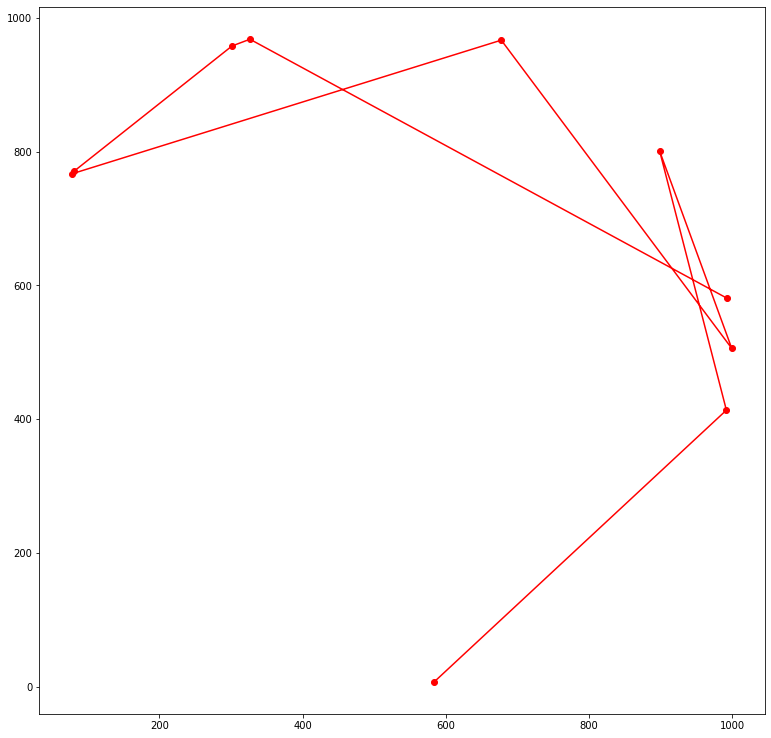

In [146]:
best_population_index = np.argmax(fitness_list)
print(best_population_index)

x = utils.get_x_list(circle_cities, population[best_population_index])
y = utils.get_y_list(circle_cities, population[best_population_index])
plt.plot(x, y, linestyle='-', marker='o', color='r')
plt.show()